# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

Los datos los encontraremos en el fichero `reviews_sentiment.csv`

In [1]:
import pandas as pd

df = pd.read_csv("data/reviews_sentiment.csv", sep=";")
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


Para facilitar el ejercicio, las columnas que utilizaremos serán: **wordcount** con la cantidad de palabras utilizadas y **sentimentValue** con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5. El campo se llama **Star Rating**

Pasos a seguir:

* Análisis inicial de los datos (visual)
* Escalado de los datos
* Separamos en train y test
* Crear modelo buscando un equilibrio entre las $k$ y la precisión (o métrica objetivo)
* Disponer un reporte de clasificación y matriz de confusión
* Concluir con el modelo obtenido y su métrica de rendimiento

In [2]:
datos = df[["wordcount", "sentimentValue", "Star Rating"]]
datos.describe()

,wordcount,sentimentValue,Star Rating
count,257.000000,257.000000,257.000000
mean,11.501946,0.383849,3.420233
std,13.159812,0.897987,1.409531
min,1.000000,-2.276469,1.000000
25%,3.000000,-0.108144,3.000000
50%,7.000000,0.264091,3.000000
75%,16.000000,0.808384,5.000000
max,103.000000,3.264579,5.000000


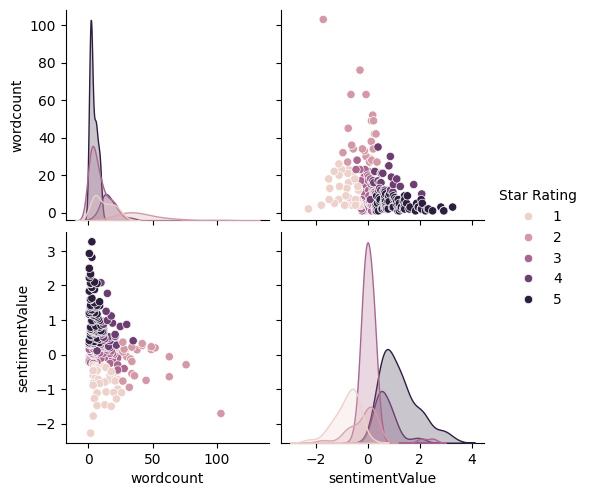

In [4]:
import seaborn as sns

sns.pairplot(datos, hue="Star Rating")

In [5]:
datos.corr()

,wordcount,sentimentValue,Star Rating
wordcount,1.000000,-0.347232,-0.402059
sentimentValue,-0.347232,1.000000,0.792180
Star Rating,-0.402059,0.792180,1.000000


<Axes: >

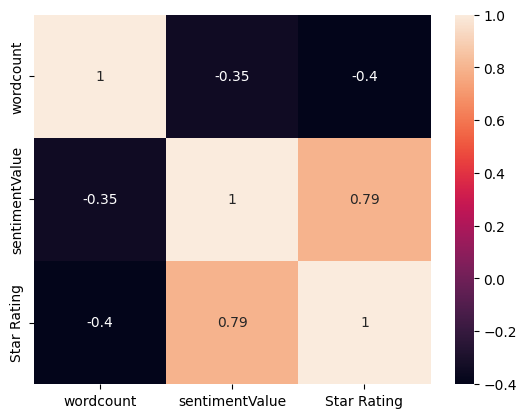

In [6]:
sns.heatmap(datos.corr(), annot=True)

In [9]:
X = datos.drop(columns=["Star Rating"])
y = datos["Star Rating"]

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Axes: xlabel='wordcount', ylabel='sentimentValue'>

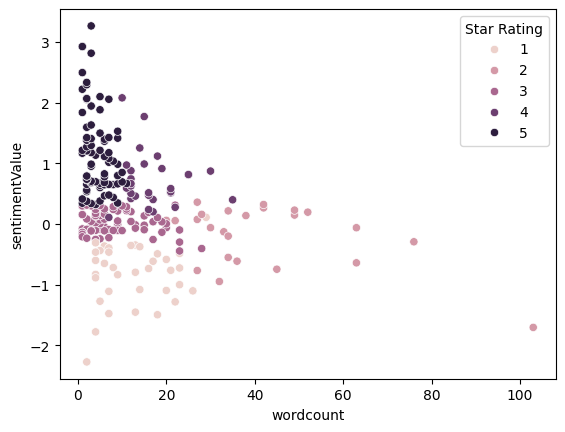

In [37]:
sns.scatterplot(data=datos, x="wordcount", y="sentimentValue", hue="Star Rating")

In [16]:
import pandas as pd

pd.DataFrame(X_scaled, columns=X.columns).describe()

,wordcount,sentimentValue
count,2.570000e+02,257.000000
mean,-2.764758e-17,0.000000
std,1.001951e+00,1.001951
min,-7.995887e-01,-2.968316
25%,-6.473143e-01,-0.548954
50%,-3.427655e-01,-0.133623
75%,3.424693e-01,0.473685
max,6.966405e+00,3.214244


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)

(192, 2)
(65, 2)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.score(X_train, y_train)

0.8802083333333334

In [29]:
knn.score(X_test, y_test)

0.7692307692307693

In [32]:
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print("K=", k)
    print("Train: ", knn.score(X_train, y_train))
    print("Test: ", knn.score(X_test, y_test))
    print('-'*50)

K= 1
Train:  0.9895833333333334
Test:  0.7846153846153846
--------------------------------------------------
K= 2
Train:  0.90625
Test:  0.7230769230769231
--------------------------------------------------
K= 3
Train:  0.8802083333333334
Test:  0.7692307692307693
--------------------------------------------------
K= 4
Train:  0.8333333333333334
Test:  0.7846153846153846
--------------------------------------------------
K= 5
Train:  0.8541666666666666
Test:  0.7538461538461538
--------------------------------------------------
K= 6
Train:  0.8229166666666666
Test:  0.7230769230769231
--------------------------------------------------
K= 7
Train:  0.8020833333333334
Test:  0.7384615384615385
--------------------------------------------------
K= 8
Train:  0.796875
Test:  0.7384615384615385
--------------------------------------------------
K= 9
Train:  0.78125
Test:  0.7538461538461538
--------------------------------------------------
K= 10
Train:  0.7708333333333334
Test:  0.769230769

In [33]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.60      0.75        10
           2       0.38      0.75      0.50         4
           3       0.68      0.83      0.75        18
           4       0.67      0.40      0.50        10
           5       0.96      0.96      0.96        23

    accuracy                           0.77        65
   macro avg       0.74      0.71      0.69        65
weighted avg       0.81      0.77      0.77        65



In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, knn.predict(X_test))

array([[ 6,  2,  1,  1,  0],
       [ 0,  3,  1,  0,  0],
       [ 0,  1, 15,  1,  1],
       [ 0,  2,  4,  4,  0],
       [ 0,  0,  1,  0, 22]], dtype=int64)

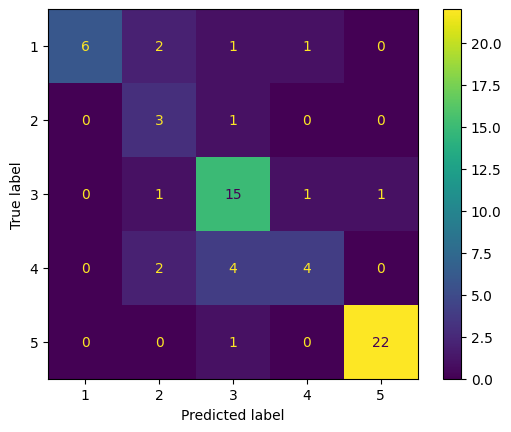

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, knn.predict(X_test), labels=[1,2,3,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[1,2,3,4,5])
disp.plot()
plt.show()